In [ ]:
import sys
!{sys.executable} -m pip install --upgrade --force-reinstall ../vampw

In [6]:
import sys
import numpy as np
from vampw.simulations import *
from vampw.vamp import *
from vampw.utils import *
import warnings
warnings.filterwarnings('ignore')

# Data simulation

In [7]:
la = 0.1 # Lambda. Probability of non-zero regression coefficients
mu = 0   # Intercept
h2 = 0.5 # Heritability. Proportion of variance explained by biological markers
distr = "Gaussian" # Prior distribution
n = 1600 # Number of samples
m = 100 # Number of biomarkers

# Bernoulli - Gaussian prior on beta (with censoring LMMSE)
X, beta_true, y, alpha, problem_instance, tot_nans, valid_stds, mask = synthetic_data(n=n, 
                                                                                      m=m, 
                                                                                      p=0.4, 
                                                                                      la=la, 
                                                                                      h2=h2, 
                                                                                      mu=mu,
                                                                                      omega=1, 
                                                                                      seed=42, 
                                                                                      distr=distr, 
                                                                                      print_results=True, 
                                                                                      sigma=None, 
                                                                                      model='Weibull',
                                                                                      censoring=0.4, 
                                                                                      censor_min=0.0, 
                                                                                      censor_max=1.0)
X_c, y_c, X, y = X[mask==0], y[mask==0], X[mask==1], y[mask==1]
data = {'X':X, 'y':y, 'X_c': X_c, 'y_c': y_c, 'beta_true':beta_true}

print(f"Var(logY) = {np.var(np.log(y))}")
print(f"Var(z) = {np.var(X @ beta_true)}")
print(f"alpha = {alpha}")
print(f"mu = {mu}")

Variance of slab part of beta: 0.04177410672723591
Simulating data with sigma: 0.049999999999999996
Working under the following model: Weibull
Var(logY) = 0.006697029182559083
Var(z) = 0.0032546487072310534
alpha = 22.866059411113113
mu = 0


# Setting vampW hyperparameters

In [8]:
hyperparams = Hyperparams('Weibull', mu, alpha)

problem = Problem(n=n, m=m, la=la, sigmas=[h2/(la*m)], omegas=[1.0], model='Weibull', hyperparams=Hyp)

pref={'update_mu': False,
      'update_alpha': False, 
      'start_at_mu': mu, 
      'start_at_alpha': alpha,
      'mode': 'censoring', 
      'dampen_coeff': 1.0, 
      'dampen_wu_it': -1, 
      'dampen_autotune': False, 
      'dampen_scale': 0.9, 
      'save': False, 
      'print_results': True, 
      'tau1':1e-4}



# Run vampW inference

gam1 = 0.0001
tau1 = 0.0001
**** iteration =  0  **** 

->DENOISING
C index = 0.5
x1_hat[2] =  [0.]
corr(x1_hat, beta_true) =  0.0
l2 error for x1_hat =  1.0
alpha1_new =  4.999963750220623e-07
alpha1 =  4.999963750220623e-07
true gam2 =  325.6527080091234
gam2 =  200.00135000168754
corr(z1_hat, X*beta_true) =  0.5785614792566715
l2 error for z1_hat =  0.9219496714991423
v1 =  3.1422576835728923e-06
true tau2 =  365.431489730637
tau2 = 31.82415188194476
Updated mu = 0 -- update alpha = 22.866059411113113
->LMMSE
Norm of x2_hat = 0.24703376211206238
corr(x2_hat, beta_true) =  0.8891283110989453
l2 error for x2_hat =  0.9219496714991423
alpha2 = 0.377309711757787
beta2 = 0.0568505980950528
alpha2 =  0.377309711757787
true gam1 =  1360.8185296595857
gam1 =  330.07074665846386
corr(z2_hat, beta_true) =  [[0.89819802]]
l2 error for z2_hat =  0.626904847238915
true tau1 =  751.2682409094964
tau1 =  527.9615486789457


-> EM update of the prior distribution parameters
lambda:0.050604552881179

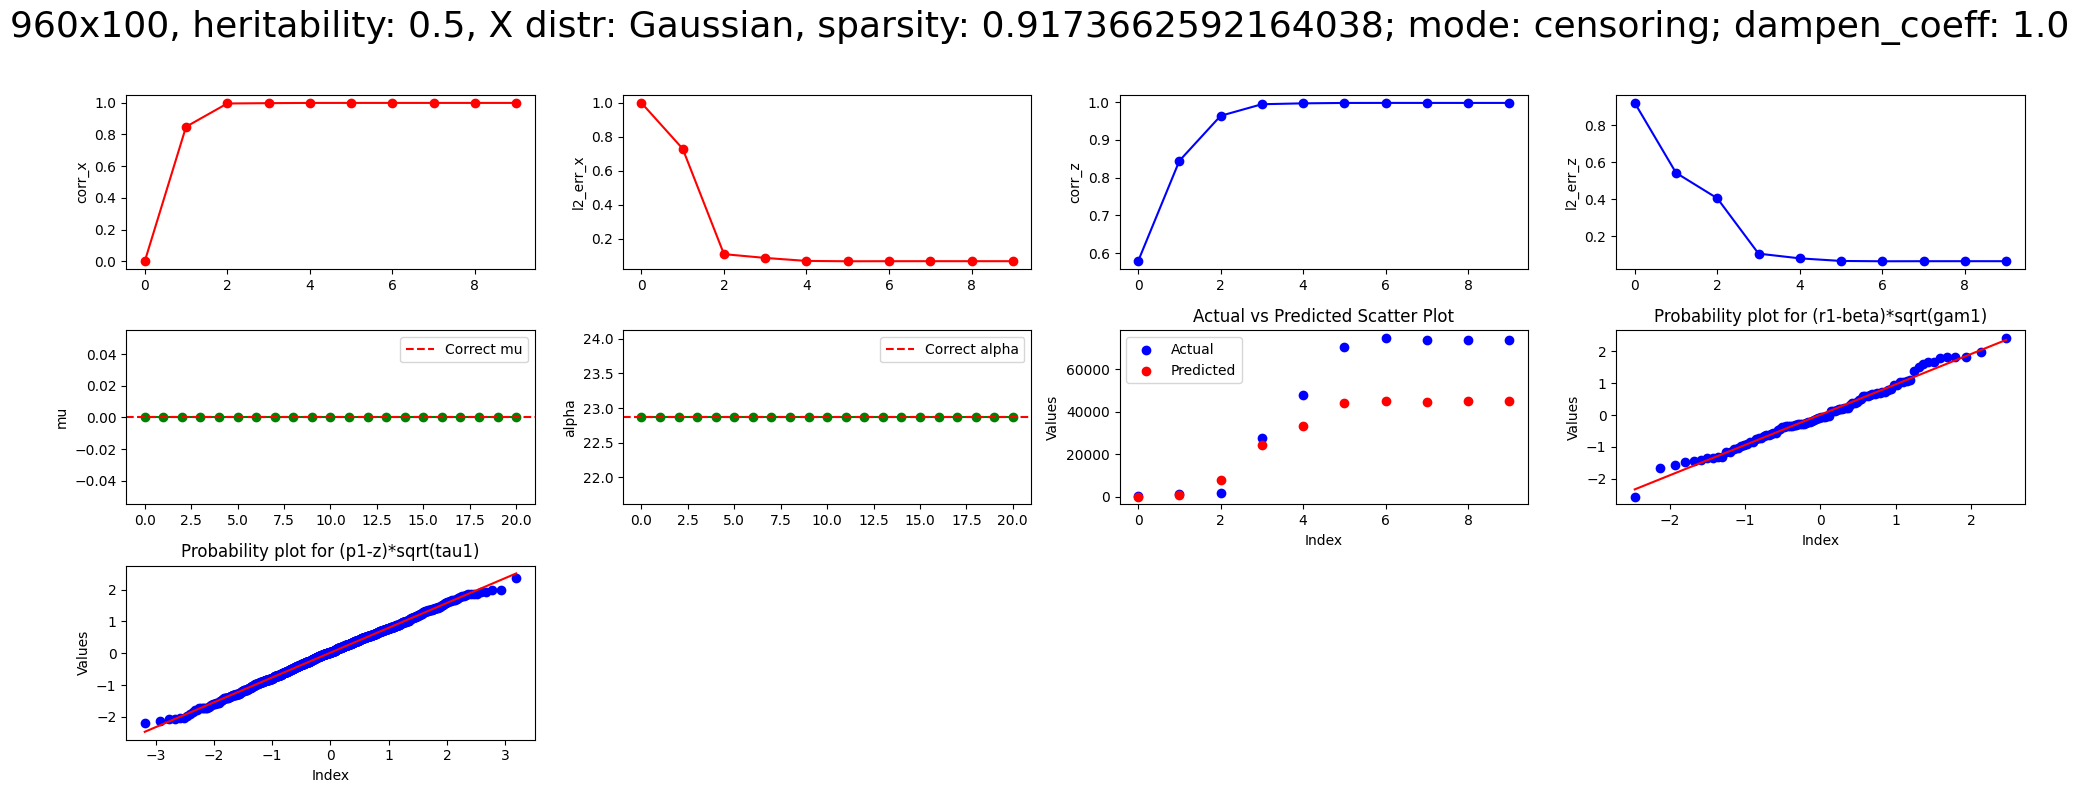

In [9]:
infere_and_visualize(data, problem, pref, seed=15, maxiter=10, h2_title=h2, distr=distr)